In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import time
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
crash = pd.read_csv('crash_clean.csv', index_col=0)
au_pop = pd.read_csv('AustinPop.csv')

In [3]:
display(crash)

Crash_ID Crash_Fatal_Fl  Crash_Date Crash_Time  Rpt_Rdwy_Sys_ID  \
0      11152580              N  01/15/2010   12:06 PM               19   
1      11153849              N  01/15/2010   04:32 PM               19   
2      11154056              N  01/13/2010   06:38 PM               19   
3      11154058              N  01/13/2010   03:47 PM               19   
4      11154059              N  01/12/2010   04:51 PM                1   
5      11154064              N  01/12/2010   10:16 AM               19   
6      11154065              N  01/12/2010   07:21 AM               19   
7      11154069              N  01/15/2010   07:31 PM               11   
8      11154070              N  01/14/2010   11:43 AM                2   
9      11154229              N  01/24/2010   09:33 AM                5   
10     11154246              N  01/13/2010   11:46 PM               19   
11     11154420              N  01/01/2010   10:16 PM               19   
12     11154424              N  01/07/2010   03:13 AM                4   
13     11154425              N  01/07/2010   07:20 AM               19   
14     11154984              N  01/15/2010   09:33 PM                1   
15     11154992              N  01/17/2010   02:32 AM               19   
16     11154995              N  01/16/2010   02:57 AM                2   
17     11154996              N  01/07/2010   05:26 PM               11   
18     11156149              N  01/14/2010   09:34 PM                4   
19     11156151              N  01/14/2010   10:37 PM                2   
20     11156152              N  01/14/2010   01:23 PM               19   
21     11156153              N  01/14/2010   02:30 AM                1   
22     11156154              N  01/14/2010   08:48 AM                3   
23     11156155              N  01/14/2010   12:29 PM                1   
24     11156156              N  01/14/2010   04:30 PM               19   
25     11156157              N  01/15/2010   08:57 AM                2   
26     11156158              N  01/15/2010   07:28 PM               19   
27     11156159              N  01/14/2010   09:33 AM               19   
28     11156198              N  01/12/2010   01:10 PM                3   
29     11156976              N  01/05/2010   03:00 AM               19   
...         ...            ...         ...        ...              ...   
11504  17278111              N  09/07/2019   12:17 PM                2   
11505  17278112              N  09/07/2019   01:36 PM               19   
11506  17278113              N  09/08/2019   04:44 PM               19   
11507  17278114              N  09/08/2019   10:30 PM               19   
11508  17278120              N  09/09/2019   10:11 AM               19   
11509  17278126              N  09/09/2019   10:57 AM               19   
11510  17278131              N  09/09/2019   11:00 AM               19   
11511  17278133              N  09/09/2019   09:42 AM               19   
11512  17278134              N  09/09/2019   12:43 PM               19   
11513  17278136              N  09/09/2019   07:24 AM               19   
11514  17278137              N  09/09/2019   02:36 PM               19   
11515  17278138              N  09/09/2019   02:51 PM               19   
11516  17278156              N  09/09/2019   09:58 AM                1   
11517  17278157              N  09/09/2019   01:55 PM               19   
11518  17278158              N  09/09/2019   04:45 PM               19   
11519  17278160              N  09/09/2019   04:20 PM               19   
11520  17278161              N  09/09/2019   05:33 PM               19   
11521  17278162              N  09/09/2019   04:20 PM               19   
11522  17278164              N  09/09/2019   04:58 PM                1   
11523  17278166              N  09/09/2019   06:22 PM               19   
11524  17278168              N  09/09/2019   08:45 PM               19   
11525  17278169              N  09/09/2019   09:16 PM               19   
11526  1727

In [4]:
crash["Crash_Date"] = pd.to_datetime(crash["Crash_Date"], format= "%m/%d/%Y")

crash["time_segment"] = np.where((crash["Crash_Date"] <= dt.date(2014,6,1)),"before", 
                              np.where((crash["Crash_Date"] > dt.date(2014,6,1)) & (crash["Crash_Date"] <= dt.date(2016,5,10)), "entry",
                                       np.where((crash["Crash_Date"] > dt.date(2016,5,10)) & (crash["Crash_Date"] <= dt.date(2017,5,29)), "exit",
                                                np.where((crash["Crash_Date"] > dt.date(2017,5,29)), "re-entry",
                                                         "error"))))
crash["uber_present"] = np.where((crash["Crash_Date"] <= dt.date(2014,6,1)),0, 
                              np.where((crash["Crash_Date"] > dt.date(2014,6,1)) & (crash["Crash_Date"] <= dt.date(2016,5,10)), 1,
                                       np.where((crash["Crash_Date"] > dt.date(2016,5,10)) & (crash["Crash_Date"] <= dt.date(2017,5,29)), 0,
                                                np.where((crash["Crash_Date"] > dt.date(2017,5,29)), 1,
                                                         "error"))))
# crash["bins"] = np.where((crash["Crash_Date"] <= dt.date(2010,1,11)),-7, 
#                       np.where((crash["Crash_Date"] > dt.date(2010,1,12)) & (crash["Crash_Date"] <= dt.date(2011,2,1)), -6,
#                           np.where((crash["Crash_Date"] > dt.date(2011,2,1)) & (crash["Crash_Date"] <= dt.date(2012,2,21)), -5,
#                               np.where((crash["Crash_Date"] > dt.date(2012,2,21)) & (crash["Crash_Date"] <= dt.date(2013,3,12)), -4,
#                                   np.where((crash["Crash_Date"] > dt.date(2013,3,12)) & (crash["Crash_Date"] <= dt.date(2014,4,1)), -3,
#                                          np.where((crash["Crash_Date"] > dt.date(2014,4,1)) & (crash["Crash_Date"] <= dt.date(2015,4,21)), -2,
#                                             np.where((crash["Crash_Date"] > dt.date(2015,4,21)) & (crash["Crash_Date"] <= dt.date(2016,5,10)), -1,
#                                                np.where((crash["Crash_Date"] > dt.date(2016,5,10)) & (crash["Crash_Date"] <= dt.date(2017,5,29)), 0,
#                                                     np.where((crash["Crash_Date"] > dt.date(2017,5,29)) & (crash["Crash_Date"] <= dt.date(2018,6,19)), 1,
#                                                         np.where((crash["Crash_Date"] > dt.date(2018,6,19)) & (crash["Crash_Date"] <= dt.date(2019,7,9)), 2,
#                                                            np.where((crash["Crash_Date"] > dt.date(2019,7,9)) & (crash["Crash_Date"] <= dt.date(2020,7,28)), 3,
#                                                                 np.where((crash["Crash_Date"] > dt.date(2020,7,28)), 4,"error"))))))))))))

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.
C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.d

In [5]:
crash

Crash_ID Crash_Fatal_Fl Crash_Date Crash_Time  Rpt_Rdwy_Sys_ID  \
0      11152580              N 2010-01-15   12:06 PM               19   
1      11153849              N 2010-01-15   04:32 PM               19   
2      11154056              N 2010-01-13   06:38 PM               19   
3      11154058              N 2010-01-13   03:47 PM               19   
4      11154059              N 2010-01-12   04:51 PM                1   
5      11154064              N 2010-01-12   10:16 AM               19   
6      11154065              N 2010-01-12   07:21 AM               19   
7      11154069              N 2010-01-15   07:31 PM               11   
8      11154070              N 2010-01-14   11:43 AM                2   
9      11154229              N 2010-01-24   09:33 AM                5   
10     11154246              N 2010-01-13   11:46 PM               19   
11     11154420              N 2010-01-01   10:16 PM               19   
12     11154424              N 2010-01-07   03:13 AM                4   
13     11154425              N 2010-01-07   07:20 AM               19   
14     11154984              N 2010-01-15   09:33 PM                1   
15     11154992              N 2010-01-17   02:32 AM               19   
16     11154995              N 2010-01-16   02:57 AM                2   
17     11154996              N 2010-01-07   05:26 PM               11   
18     11156149              N 2010-01-14   09:34 PM                4   
19     11156151              N 2010-01-14   10:37 PM                2   
20     11156152              N 2010-01-14   01:23 PM               19   
21     11156153              N 2010-01-14   02:30 AM                1   
22     11156154              N 2010-01-14   08:48 AM                3   
23     11156155              N 2010-01-14   12:29 PM                1   
24     11156156              N 2010-01-14   04:30 PM               19   
25     11156157              N 2010-01-15   08:57 AM                2   
26     11156158              N 2010-01-15   07:28 PM               19   
27     11156159              N 2010-01-14   09:33 AM               19   
28     11156198              N 2010-01-12   01:10 PM                3   
29     11156976              N 2010-01-05   03:00 AM               19   
...         ...            ...        ...        ...              ...   
11504  17278111              N 2019-09-07   12:17 PM                2   
11505  17278112              N 2019-09-07   01:36 PM               19   
11506  17278113              N 2019-09-08   04:44 PM               19   
11507  17278114              N 2019-09-08   10:30 PM               19   
11508  17278120              N 2019-09-09   10:11 AM               19   
11509  17278126              N 2019-09-09   10:57 AM               19   
11510  17278131              N 2019-09-09   11:00 AM               19   
11511  17278133              N 2019-09-09   09:42 AM               19   
11512  17278134              N 2019-09-09   12:43 PM               19   
11513  17278136              N 2019-09-09   07:24 AM               19   
11514  17278137              N 2019-09-09   02:36 PM               19   
11515  17278138              N 2019-09-09   02:51 PM               19   
11516  17278156              N 2019-09-09   09:58 AM                1   
11517  17278157              N 2019-09-09   01:55 PM               19   
11518  17278158              N 2019-09-09   04:45 PM               19   
11519  17278160              N 2019-09-09   04:20 PM               19   
11520  17278161              N 2019-09-09   05:33 PM               19   
11521  17278162              N 2019-09-09   04:20 PM               19   
11522  17278164              N 2019-09-09   04:58 PM                1   
11523  17278166              N 2019-09-09   06:22 PM               19   
11524  17278168              N 2019-09-09   08:45 PM               19   
11525  17278169              N 2019-09-09   09:16 PM               19   
11526  17278170              N 2019-09-09   08:45 PM             

In [6]:
crash_gb = crash[['Crash_ID','Crash_Date']]

In [7]:
crash_gb = crash_gb.set_index('Crash_Date')

In [8]:
annual_crash_numbers = crash_gb.resample('Y', how='count')

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


In [9]:
ann_crashes_normalized = annual_crash_numbers
ann_crashes_normalized = ann_crashes_normalized.reset_index()

In [10]:
ann_crashes_normalized

Crash_Date  Crash_ID
0 2010-12-31     12868
1 2011-12-31     13058
2 2012-12-31     14887
3 2013-12-31     14832
4 2014-12-31     13654
5 2015-12-31     15630
6 2016-12-31     17252
7 2017-12-31     16733
8 2018-12-31     16853
9 2019-12-31     11534

In [11]:
au_pop

Year  Population
0  2010      806423
1  2011      828694
2  2012      854841
3  2013      875463
4  2014      901734
5  2015      921545
6  2016      939768
7  2017      951750
8  2018      964254
9  2019      993182

In [12]:
ann_crashes_normalized['Crash_ID'] = ann_crashes_normalized['Crash_ID']/au_pop['Population']

In [13]:
ann_crashes_normalized

Crash_Date  Crash_ID
0 2010-12-31  0.015957
1 2011-12-31  0.015757
2 2012-12-31  0.017415
3 2013-12-31  0.016942
4 2014-12-31  0.015142
5 2015-12-31  0.016961
6 2016-12-31  0.018358
7 2017-12-31  0.017581
8 2018-12-31  0.017478
9 2019-12-31  0.011613

In [14]:
ann_crashes_normalized = ann_crashes_normalized.rename({'Crash_ID' : 'Crashes per Person'}, axis='columns')

In [15]:
ann_crashes_normalized

Crash_Date  Crashes per Person
0 2010-12-31            0.015957
1 2011-12-31            0.015757
2 2012-12-31            0.017415
3 2013-12-31            0.016942
4 2014-12-31            0.015142
5 2015-12-31            0.016961
6 2016-12-31            0.018358
7 2017-12-31            0.017581
8 2018-12-31            0.017478
9 2019-12-31            0.011613

C:\Users\rmead\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(30, 20, 'Uber Returns')

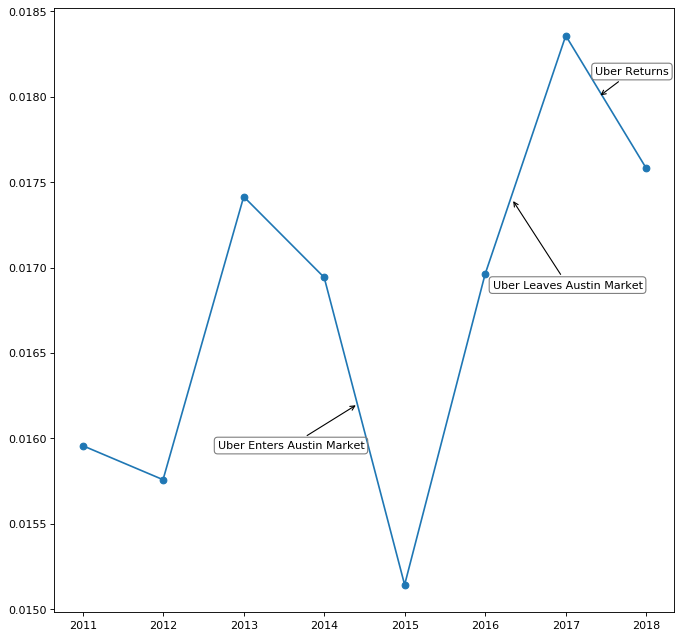

In [16]:
plt.figure(num=None, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(ann_crashes_normalized['Crash_Date'][:-2],ann_crashes_normalized['Crashes per Person'][:-2],marker="o")

#plt.annotate(dt.date(2014,6,1), dt.date(2016,5,10)):
plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),0.0162), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-60, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),0.0174), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(50, -80), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),0.018), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(30,20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))